##### Cours : OpenClassRooms

La data visualisation avec Matplotlib

##### Date : 27-01-23
***

In [1]:
import pandas as pd
import numpy as np

In [12]:
# Importation du fichier des prêts
prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets.csv')

# calcul du taux d'endettement
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

# renommer taux en taux_interet
prets.rename(columns={'taux':'taux_interet'}, inplace=True)

# calculer le cout total du pret
prets['cout_total'] = prets['remboursement'] * prets['duree']

# calculer les bénéfices mensuels réalisés
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

# création d'une variable risque
prets['risque'] = 'Non'
prets.loc[prets['taux_endettement'] > 35, 'risque'] = 'Oui'

# dataframe de profils clients
profil_clients = prets.groupby('identifiant')[['remboursement','taux_endettement','cout_total','benefices']].sum()
profil_clients.reset_index(inplace=True)

##### <font color = 'green'>La librairie Matplotlib</font>

Pour représenter graphiquement les données ressorties d'un array Numpy et/ou d'une DF Pandas, on peut recourir à la librairie Matplotlib. <br>
Cette librairie dispose de sous-librairies, dont pyplot. <br><br>

Chaque représentation graphique a une fonction correspondante avec Matplotlib :<br>
-> nuage de points ou scatter plot, en anglais : scatter()<br>
-> diagrammes circulaires : pie()<br>
-> diagrammes en barres : bar()<br>
-> histogrammes : hist()<br>
-> diagrammes en ligne ou en courbes : plot()

In [8]:
# Installation du package directement à partir de Jupyter
# %pip install matplotlib

In [7]:
import matplotlib.pyplot as plt

<font color = 'yellow'>Le nuage de points - scatter()</font><br><br>

Documentation : https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html <br>

Le nuage de points est utilisé pour afficher deux variables numériques <br>
Il existe de nombreuses options pour personnaliser un nuage de points. On peut modifier : <br>
-> la couleur des points, en utilisant l’argument 'color' ou 'c'<br>
-> la taille des points, via l’argument 's'<br>
-> le type de marqueur via l’argument 'marker'<br>
-> la transparence des points via l’argument 'alpha'<br>

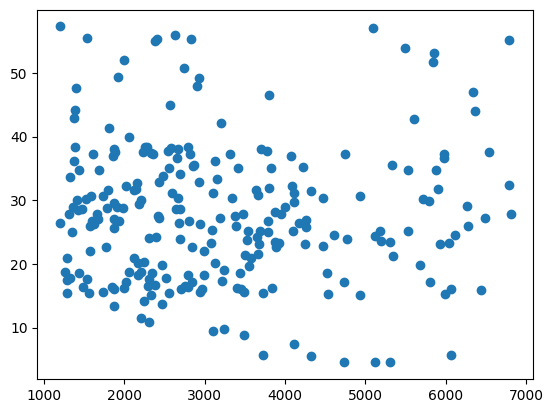

In [13]:
# Représenation du taux d'endettement en fonction du revenu 
# (deux variables numériques)
plt.scatter(
    prets['revenu'], # axe des x
    prets['taux_endettement'] # axe des y
    )

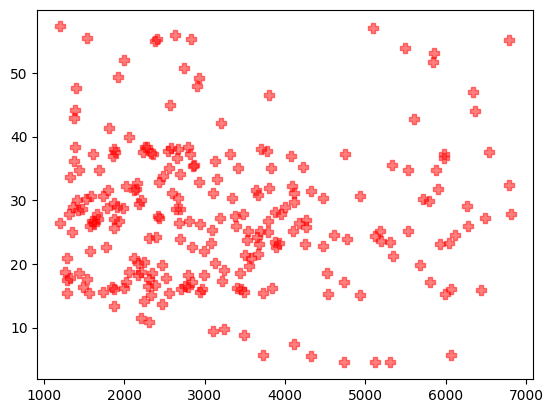

In [17]:
# Même graphique, vec des croix rouges dont la taille aura été modifiée,
# et avec 50 % de transparence
plt.scatter(
    prets['revenu'], # axe des x
    prets['taux_endettement'], # axe des y,
    color='red', # couleur des points
    marker='P', # type de marqueur
    alpha=0.5, # transparence des points
    s=60 # taille des points
    )

<font color = 'yellow'>Le diagramme circulaire - pie()</font><br><br>

Documentation : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html <br>

Le diagramme circulaire est utilisé pour afficher une variable numérique et une variable numérique. <br>
Il sera surtout utilisé pour représenter max 5 secteurs. <br>
On peut modifier en insérant l'argument 'autopct' pour afficher les %



In [18]:
# Détermination du CA par agence
data = prets.groupby('ville')['remboursement'].sum()
data = data.reset_index()

([<matplotlib.patches.Wedge at 0x270da6a8550>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563614, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.3566773649937175, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')])

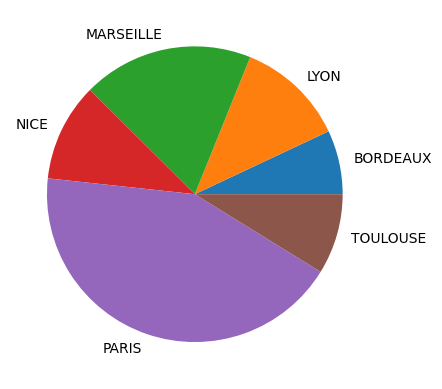

In [19]:
# Représentation graphique
plt.pie(
    x=data['remboursement'], 
    labels=data['ville'])

([<matplotlib.patches.Wedge at 0x270da705280>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563614, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.3566773649937175, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')],
 [Text(0.58557179443924, 0.1307886598952998, '6.99%'),
  Text(0.41235163272775605, 0.43585104219991694, '11.89%'),
  Text(-0.12043352356671061, 0.5877888791065262, '18.66%'),
  Text(-0.5415580093695176, 0.2582923198388319, '10.74%'),
  Text(-0.19455128999657315, -0.5675824130121274, '42.91%'),
  Text(0.5772192902910896, -0.1637616894021637, '8.80%')])

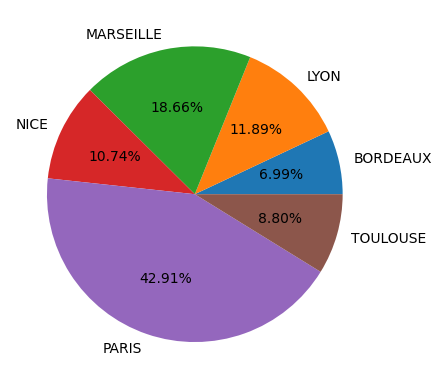

In [20]:
# Affichage des %
plt.pie(
    x=data['remboursement'], 
    labels=data['ville'], 
    autopct='%.2f%%')

<font color = 'yellow'>Le diagramme à barres - bar()</font><br><br>

Documentation : https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.bar.html <br>

Le diagramme à barre est l'alternative du diagramme circulaire'<br>
Pour utiliser la fonction bar, qui est l’implémentation de Matplotlib des diagrammes à barres, il faut préciser deux arguments :<br>
-> x : les différentes valeurs de la variable non numérique, l’équivalent du 'labels' de pie<br>
-> height : les valeurs agrégées, équivalent du 'x' de pie<br>

<BarContainer object of 6 artists>

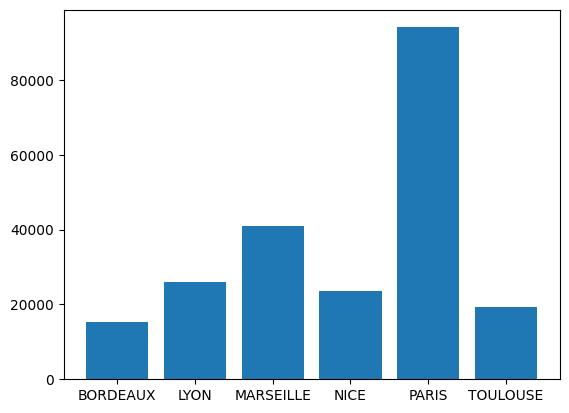

In [21]:
# Représentation graphique des données que celles affichées avec le camembert
plt.bar(
    height=data['remboursement'], 
    x=data['ville'])

<BarContainer object of 6 artists>

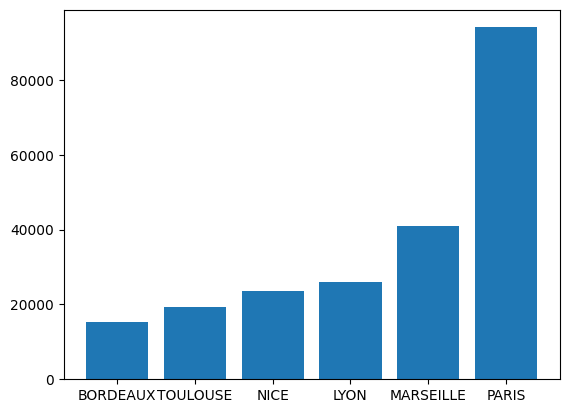

In [23]:
# Et par ordre croissant...
data_sorted = data.sort_values('remboursement', ascending=True)
plt.bar(
    height=data_sorted['remboursement'], 
    x=data_sorted['ville'])

<font color = 'yellow'>L'histogramme - hist()</font><br><br>

Documentation : https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html <br>

L’histogramme est particulièrement utile lorsqu’on souhaite avoir une idée de la distribution d’une variable.<br> 
La fonction Matplotlib correspondante est hist.<br> 
Il suffit de lui passer en paramètre la variable numérique dont on souhaite connaître la distribution

(array([38., 42., 43., 27., 31., 17., 10., 11., 15., 10.]),
 array([1200. , 1760.7, 2321.4, 2882.1, 3442.8, 4003.5, 4564.2, 5124.9,
        5685.6, 6246.3, 6807. ]),
 <BarContainer object of 10 artists>)

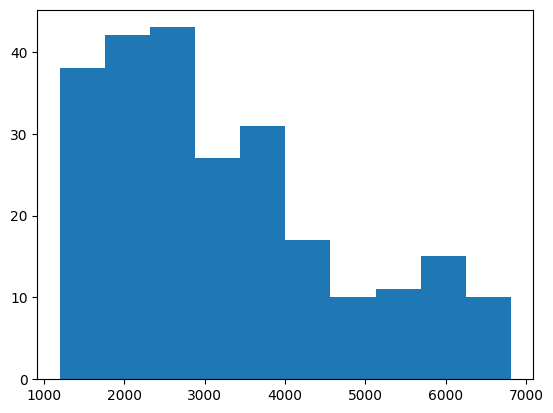

In [24]:
# Répartition des clients en terme de revenus
plt.hist(prets['revenu'])

<font color = 'yellow'>Les courbes - plot()</font><br><br>

Documentation : https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html <br>

Les courbes sont surtout utilisées pour une évolution dans le temps. <br>
Une courbe prend deux arguments en entrée : <br>
-> les informations à mettre en abscisse <br>
-> et celles à mettre en ordonnée

In [28]:
# On souhaite suivre l’évolution du chiffre d'affaires sur les 4 premiers mois, 
# pour voir la façon dont il varie, et éventuellement anticiper la suite.
# Nous avons pour cela à notre disposition le chiffre d'affaires réalisé 
# par notre banque sur les prêts de janvier à avril 2013 :
evolution_ca = pd.DataFrame({
    'date':['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01'],
    "chiffre d'affaire":[183_000, 193_020, 179_032, 219_174]})
evolution_ca

,date,chiffre d'affaire
0,2013-01-01,183000
1,2013-02-01,193020
2,2013-03-01,179032
3,2013-04-01,219174


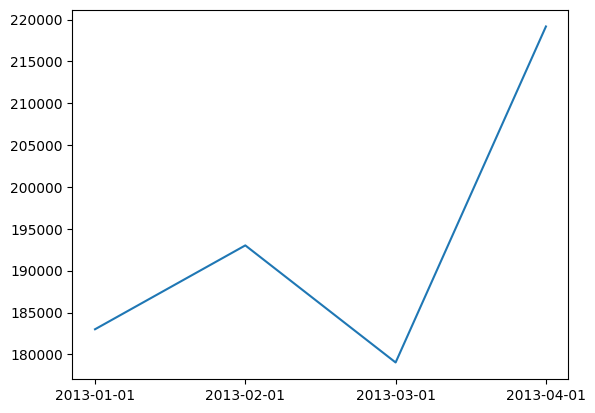

In [29]:
# Représentation graphique
plt.plot(
    evolution_ca['date'], # l'axe des x
    evolution_ca["chiffre d'affaire"] # l'axe des y
    )

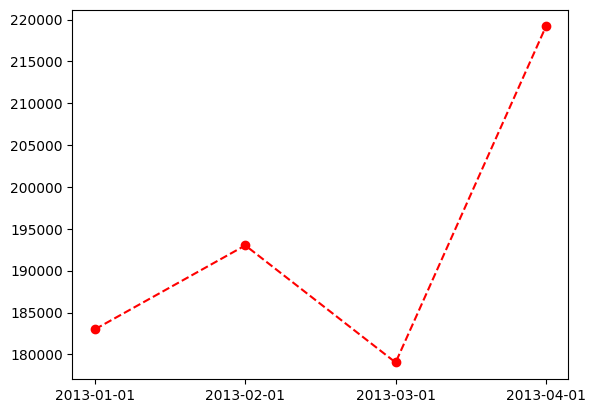

In [30]:
# Même exemple, avec des lignes rouges hachurées, 
# où on ajoute un point à chaque date
plt.plot(evolution_ca['date'], # l'axe des abscisses
         evolution_ca["chiffre d'affaire"], # l'axe des ordonnées
         marker='o', # un point à chaque date
         linestyle='--', # ligne hachurée
         color='red' # couleur de la ligne
         )

<font color = 'yellow'>Créer plusieurs graphiques sur une même fenêtre</font><br><br>

Exemple : obtenir sur un seul graphique, une idée du comportement des agences en termes d’attribution de taux, en fonction du revenu.

In [31]:
# Récupération du fichier
prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets.csv')
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [32]:
# Création d'une DF pour chaque agence
df1 = prets.loc[prets['ville'] == 'TOULOUSE', :]
df2 = prets.loc[prets['ville'] == 'PARIS', :]

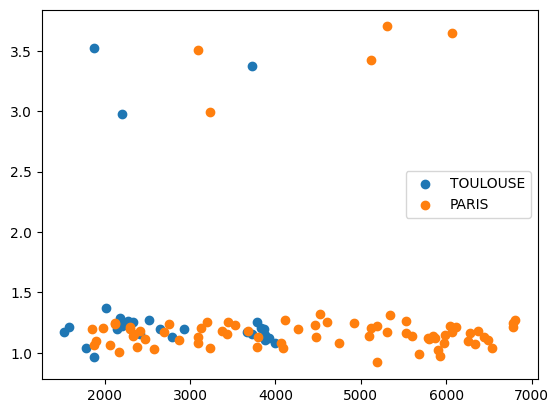

In [35]:
# Représentation par nuage de points des 2 DF avec ajout de légende
plt.scatter(df1['revenu'], df1['taux'], label='TOULOUSE')
plt.scatter(df2['revenu'], df2['taux'], label='PARIS')
plt.legend()


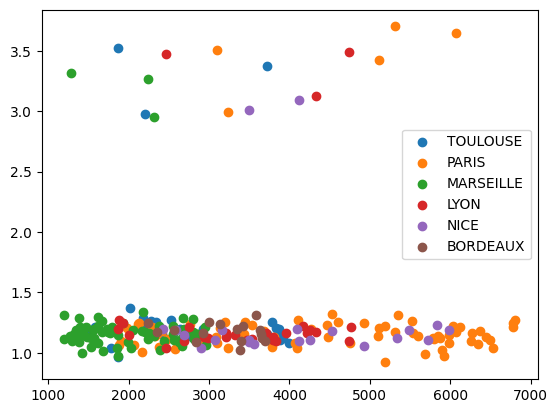

In [37]:
# Recours à une boucle pour afficher toutes les villes dans un même graphique
for city in prets['ville'].unique():
    df = prets.loc[prets['ville'] == city, :]
    plt.scatter(df['revenu'], df['taux'], label=city)
plt.legend()

##### <font color = 'green'>Cas pratique</font>

Vous êtes en train de préparer le reporting mensuel que vous devez présenter chaque fin de mois à votre responsable. La présentation devra comprendre certains graphiques clés : vous allez donc devoir utiliser vos compétences en data visualisation pour produire les différentes visualisations attendues.

Les graphiques à produire sont donc : 
- la proportion de prêt par type de prêt
- le bénéfice mensuel réalisé en fonction du revenu du client pour les prêts immobiliers uniquement
- la distribution des bénéfices réalisés
- le bénéfice mensuel total réalisé par agence

Pour réaliser les différents graphiques, nous utiliserons le fichier de prêt enrichi

In [38]:
prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets_final.csv')
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


<font color = 'yellow'>1. proportion de prêt par type de prêt</font>

Il faudra au préalable réaliser une agrégation. Cette agrégation peut être réalisée de différentes façons. Je vous propose d'en découvrir au moins 2 :
- via le `groupby`
- la la méthode `value_counts`

Les deux résultats seront strictement identiques 

In [41]:
# On peutavec groupby :
type_agreg = prets.groupby('type').size().reset_index()

# via la fonction value_counts :
type_agreg = prets['type'].value_counts().reset_index()

# renommer toutes les colonnes en une fois :
type_agreg.columns = ['type','nombre']

type_agreg

,type,nombre
0,immobilier,228
1,automobile,16


<BarContainer object of 2 artists>

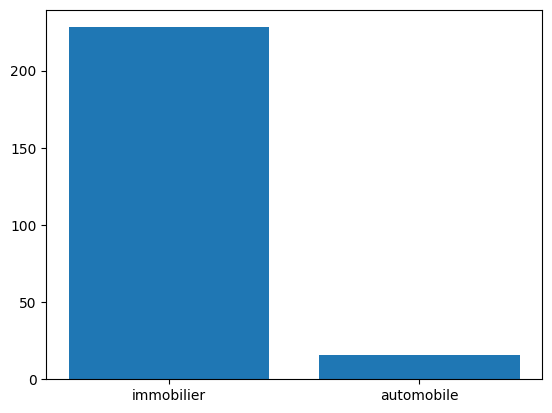

In [42]:
# Visualisation à partir d'un diagramme à barres
plt.bar(
    type_agreg['type'], # Axe des abcisses
    type_agreg['nombre']) # Axe des ordonnées

([<matplotlib.patches.Wedge at 0x270dad3a790>,
 [Text(-1.0767412667284106, 0.22500720993803233, 'immobilier'),
  Text(1.0767412772617573, -0.22500715953213574, 'automobile')],
 [Text(-0.5873134182154967, 0.1227312054207449, '93.44%'),
  Text(0.5873134239609584, -0.12273117792661947, '6.56%')])

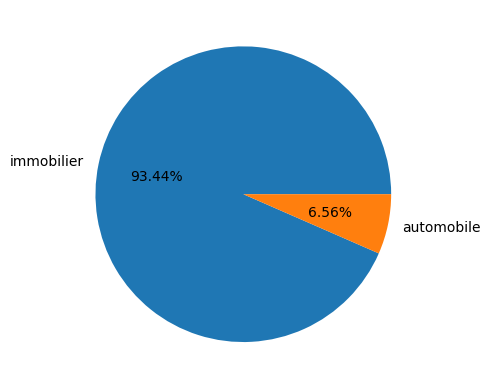

In [43]:
# Visuation à partir d'un diagramme circulaire
plt.pie(
    x=type_agreg['nombre'], 
    labels=type_agreg['type'], 
    autopct='%.2f%%')

<font color = 'yellow'>2. bénéfice mensuel réalisé en fonction du revenu du client - prêts immobiliers</font>

On souhaite représenter 2 variables numériques : on optera donc pour un nuage de points

In [46]:
# Récupération des données filtrées par le type de prêt : 'immobilier'
prets_imo = prets.loc[prets['type'] == 'immobilier', :]
prets_imo.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.8,271212.0,131.99,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.5,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.5,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.8,105485.4,44.57,Non
5,4,MARSEILLE,13012,1476.0,423.61,240,immobilier,1.209,28.7,101666.4,51.21,Non


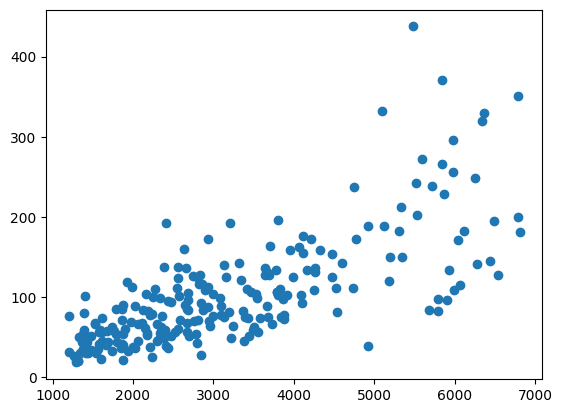

In [47]:
# Affichage des données sous forme d'un nuage deux points 
# car on a besoin de deux variables numériques (revenu et bénéfices)
plt.scatter(
    prets_imo['revenu'], 
    prets_imo['benefices'])

<font color = 'yellow'>3. La distribution des bénéfices réalisés</font>

On souhaite représenter la distribution d'une variable numérique : on utilisera donc un histogramme.

(array([63., 77., 57., 20., 12.,  7.,  2.,  4.,  1.,  1.]),
 array([  8.49 ,  51.404,  94.318, 137.232, 180.146, 223.06 , 265.974,
        308.888, 351.802, 394.716, 437.63 ]),
 <BarContainer object of 10 artists>)

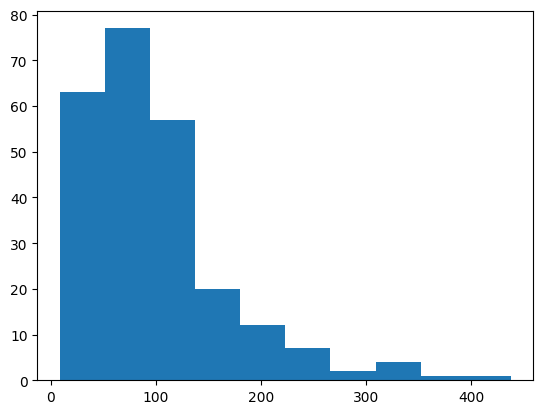

In [48]:
plt.hist(prets['benefices'])

<font color = 'yellow'>4. bénéfice mensuel total réalisé par agence</font>

In [51]:
# Récupération des bénéfices réalisés par agence
benef_ville = prets.groupby('ville')['benefices'].sum().reset_index()
benef_ville

,ville,benefices
0,BORDEAUX,1681.32
1,LYON,3014.80
2,MARSEILLE,4395.91
3,NICE,2682.75
4,PARIS,10016.35
5,TOULOUSE,2138.07


<BarContainer object of 6 artists>

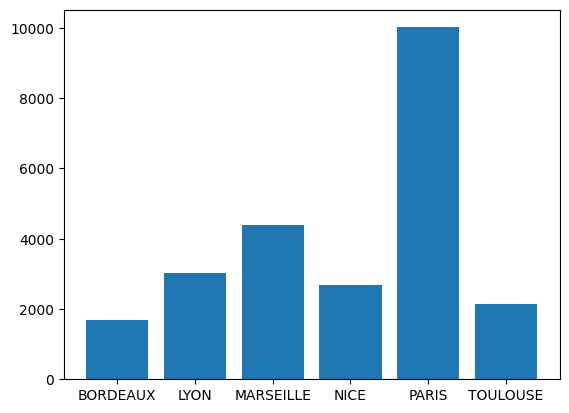

In [52]:
# Affichage par graphique
plt.bar(
    benef_ville['ville'], 
    benef_ville['benefices'])